In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [3]:
stats.poisson(2)

<BarContainer object of 12 artists>

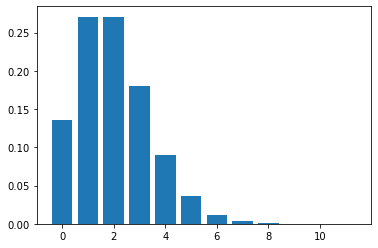

In [15]:
x = np.arange(0,12)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)

In [ ]:
#What is the probability that no cars drive up in the noon hour?

In [4]:
stats.poisson(2).pmf(0)
#this is theoretical

0.1353352832366127

In [7]:
(np.random.poisson(2,10000)==0).mean()

0.1347

In [ ]:
#What is the probability that 3 or more cars come through the drive through?

In [9]:
stats.poisson(2).sf(2)
#theoretical

0.32332358381693654

In [11]:
(np.random.poisson(2, 10000) >=3).mean()
#experimental answer

0.3108

In [ ]:
#How likely is it that the drive through gets at least 1 car?

In [13]:
stats.poisson(2).sf(0)
#theoretical

0.8646647167633873

In [16]:
(np.random.poisson(2, 10000) >=1).mean()
#experimental

0.8699

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [25]:
student_class = stats.norm(3.0, .3)
student_class

In [ ]:
#What grade point average is required to be in the top 5% of the graduating class?

In [32]:
student_class.isf(.05)

3.4934560880854417

In [ ]:
#What GPA constitutes the bottom 15% of the class?

In [33]:
student_class.ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [35]:
student_class.ppf([.2 , .3])
#yes this person is able to recive the scholarship 

array([2.74751363, 2.84267985])

In [ ]:
#If I have a GPA of 3.5, what percentile am I in?

In [36]:
student_class.cdf(3.5)

0.9522096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [39]:
stats.binom(4326, .02).sf(96)#97 or more so we ahve to put 96 

0.13975823631416448

In [ ]:
#theres eaither a one or a zero so a binomial 

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [ ]:
#What is the probability that at least one of your first 60 answers is correct?

In [40]:
p = .01
n = 60 #these are the first 60 questions

stats.binom(n,p).sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
#on any given day would just mean one day

In [3]:
p = .03

n = (.9 * 3 * 22)

stats.binom(n,p).sf(0)

0.8362274861228873

In [4]:
#this is for two days 
stats.binom(n* 2, p).pmf(0)

0.026821436301628983

In [5]:
#this is for all week 
stats.binom(n* 5, p).pmf(0)

0.00011781621791055051

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with 

a mean of 15 and standard deviation of 3. 

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
#A normal distribution with μ = 70, σ = 8
#my_normal_distribution = norm(70, 8)

In [11]:
mean = 15 

std = 3 

order_food_time = 10 
time_to_eat = 15 
total_time = 60 

total_wait_time = total_time - (order_food_time + time_to_eat)

stats.norm(15 *2 ,3 *2).cdf(total_wait_time)
#this method was off by about .10

0.7976716190363569

In [ ]:
# one other method, correct method 

In [11]:
mean = 15*2
std_dev = 3*2 


stats.norm(mean, std_dev).cdf(33)

0.6914624612740131

In [ ]:
#simulation method

In [12]:
(np.random.normal(15,3,100000)< 16.5).mean()

0.69265

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [5]:
import env

In [13]:
from env import host, user, password

get_db_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
 
salaries = pd.read_sql(query, get_db_url)

In [14]:
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



In [15]:
mean = salaries.salary.mean()
std_dev = salaries.salary.std()

In [16]:
mean, std_dev

(72012.23585730705, 17309.99538025198)

In [ ]:
#What percent of employees earn less than 60,000?

In [18]:
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

In [ ]:
#What percent of employees earn more than 95,000?

In [19]:
stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

In [ ]:
#What percent of employees earn between 65,000 and 80,000?

In [20]:
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

In [ ]:
#What do the top 5% of employees make?

In [21]:
stats.norm(mean, std_dev).isf(.05)

100484.64454102777

In [2]:
3/15

0.2